### Import the packages

In [12]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

import scipy.stats
import pylab

### Importing the Data

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [4]:
df_comp = raw_csv_data.copy()

### Examining the Data

In [5]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [6]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [10]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [13]:
df_comp.shape

(6269, 5)

### Plotting the Data

In [21]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_comp.index, y=df_comp["spx"],
            mode='lines',
            name="SPX"))

fig.add_trace(go.Scatter(x=df_comp.index, y=df_comp["ftse"],
            mode='lines',
            name="FTSE"))

fig.update_layout(title_text="Prices Comparison", title_x=0.5,\
            xaxis_title='t', yaxis_title="Prices",\
            height = 400, width = 700, font={'size':10})


fig.show()

### The QQ Plot

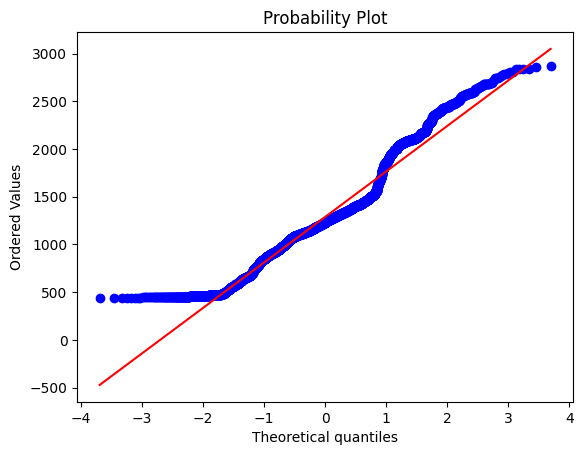

In [24]:
scipy.stats.probplot(df_comp["spx"], plot=pylab)
pylab.show()

### Time Period

In [25]:
df_comp["date"] = pd.to_datetime(df_comp["date"], dayfirst=True) 

In [26]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [28]:
df_comp["date"].describe()

C:\Users\cliente\AppData\Local\Temp\ipykernel_15220\3956235782.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

### Setting the index

In [30]:
df_comp.set_index("date", inplace=True)

In [31]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting the frequency

In [35]:
df_comp = df_comp.asfreq("b") # b -> business days

In [36]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Handling Missing Values

In [37]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [38]:
# front filling -> assigns the value of te previous period
# back filling -> assigns the value of the next period
# assigning the same value -> assign the averaeg to all missing values (not recommended)

In [39]:
df_comp["spx"] = df_comp["spx"].fillna(method="ffill") 

In [40]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [41]:
df_comp["ftse"] = df_comp["ftse"].fillna(method="bfill") 

In [42]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [43]:
df_comp["dax"] = df_comp["dax"].fillna(value = df_comp["dax"].mean()) 

In [44]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

### Simplifying the dataset

In [45]:
df_comp["market_value"] = df_comp["spx"]

In [46]:
del df_comp["spx"]

In [47]:
df_comp.head()

,dax,ftse,nikkei,market_value
date,,,,
1994-01-07,2224.95,3445.98,18124.01,469.90
1994-01-10,2225.00,3440.58,18443.44,475.27
1994-01-11,2228.10,3413.77,18485.25,474.13
1994-01-12,2182.06,3372.02,18793.88,474.17
1994-01-13,2142.37,3360.01,18577.26,472.47


In [48]:
del df_comp["dax"], df_comp["ftse"], df_comp["nikkei"]

In [49]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [50]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


### Splitting the data

In [51]:
size = int(len(df_comp)*0.8)

In [52]:
df = df_comp.iloc[:size]

In [53]:
df_test = df_comp.iloc[size:]

In [55]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [56]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
